# Averaged Prediction over entire cohort

In [1]:
import pandas as pd
from utils.data_loader import load_data
pd.options.mode.chained_assignment = None

df, config, features = load_data()

Shape of SHAP values: (1548, 10, 3)
Mean SHAP values for class ALL:
Fibrinogen_g_L: -0.04720393940806389
MCV_fL: 0.2325565069913864
Monocytes_percent: -0.12963202595710754
LDH_UI_L: -0.10223531723022461
PT_percent: -0.15002286434173584
MCHC_g_L: 0.014433558098971844
Lymphocytes_G_L: 0.011618806049227715
age: 0.1512002944946289
Monocytes_G_L: -0.03239293396472931
Platelets_G_L: 0.013771194033324718
Mean SHAP values for class AML:
Fibrinogen_g_L: 0.02287321351468563
MCV_fL: -0.5154961943626404
Monocytes_percent: 0.15944012999534607
LDH_UI_L: 0.04935334995388985
PT_percent: 0.05343053862452507
MCHC_g_L: 0.020772483199834824
Lymphocytes_G_L: 0.006259033922106028
age: -0.5627624988555908
Monocytes_G_L: 0.07798221707344055
Platelets_G_L: -0.015231085941195488
Mean SHAP values for class APL:
Fibrinogen_g_L: -0.10037827491760254
MCV_fL: -0.012335429899394512
Monocytes_percent: -0.020728789269924164
LDH_UI_L: 0.06595607846975327
PT_percent: -0.3474329710006714
MCHC_g_L: -0.22968700528144836
Lym

Summary plot for class ALL:


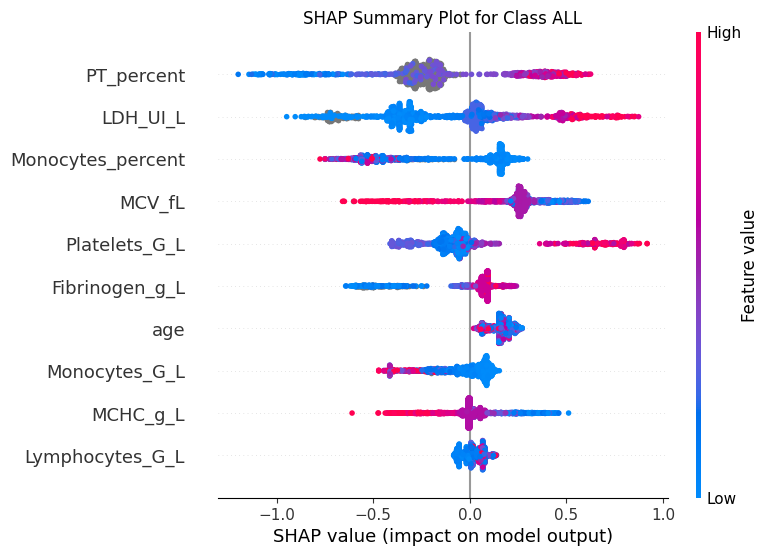

Summary plot for class AML:


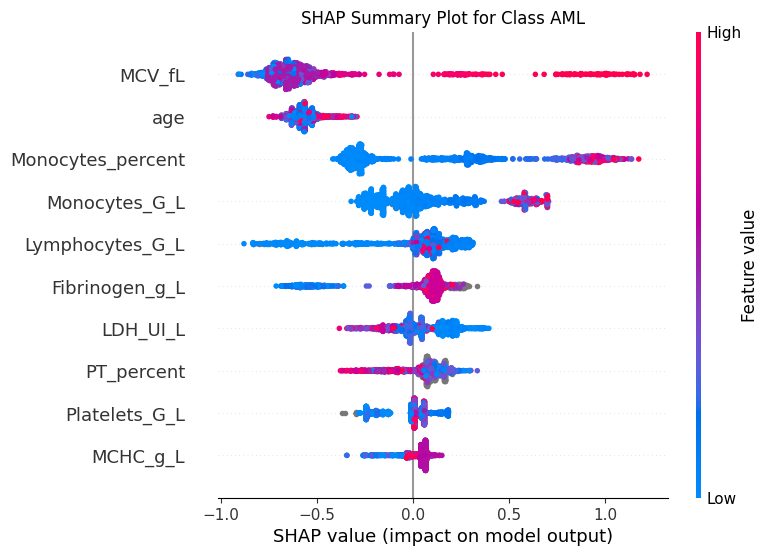

Summary plot for class APL:


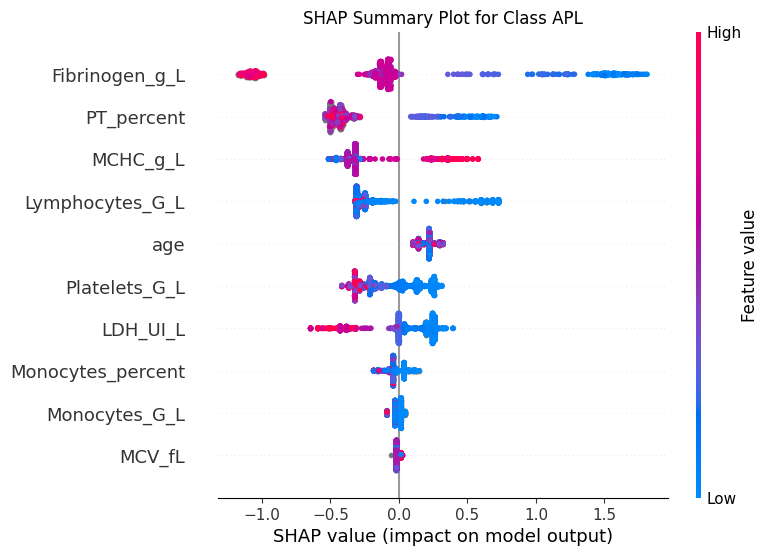

In [2]:
import xgboost as xgb
import shap
import numpy as np
import matplotlib.pyplot as plt


# Load the XGBoost model
model = xgb.Booster(model_file='model.json')

# Calculate Monocytes_percent for each row in the DataFrame
df['mono_percent'] = (df['Monocytes_G_L'] * 100) / df['WBC_G_L']

data_for_prediction = df[features]
dtest = xgb.DMatrix(data_for_prediction)
predictions = model.predict(dtest)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(dtest)
print("Shape of SHAP values:", np.shape(shap_values))

# Aggregate SHAP values by taking the mean over all samples for each class
mean_shap_values = np.mean(shap_values, axis=0)
class_name = {0: 'ALL', 1: 'AML', 2: 'APL'}

# Print the mean SHAP values for each feature by class
for class_index in range(mean_shap_values.shape[1]):
    print(f"Mean SHAP values for class {class_name[class_index]}:")
    for feature_index, feature_name in enumerate(features):
        print(f"{feature_name}: {mean_shap_values[feature_index, class_index]}")

# Init the JavaScript visualization library
shap.initjs()

# Generate summary plots for each class
for class_index in range(mean_shap_values.shape[1]):
    print(f"Summary plot for class {class_name[class_index]}:")
    shap.summary_plot(shap_values[:, :, class_index], data_for_prediction, show=False)
    plt.title(f"SHAP Summary Plot for Class {class_name[class_index]}")
    plt.show()